# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset de treino
df = pd.read_csv("train.csv")

In [4]:
# Visualizando essa base
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# Retornando o shape da base
df.shape

1460

In [7]:
# E as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [16]:
# Visualizando quantidade de valores vazios
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [22]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = df.columns[(df.isnull().sum()/df.shape[0]) > 0.1]

In [23]:
# Eliminando essas colunas
df = df.drop(eliminar,axis=1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Vamos **eliminar as colunas de texto**
    - Precisamos **tratar os valores vazios**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [28]:
# Selecionando apenas as colunas numéricas
colunas = df.columns[df.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [87]:
# E criar uma nova base com esses valores
df2 = df.loc[:,colunas]
df2.head(3)
print(df2.shape)

(1460, 37)


In [33]:
# Verificando os valores vazios
df2.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [34]:
# Substituindo os valores vazios por -1
df2 = df2.fillna(-1)

- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [41]:
# Selecionando X e y
X = df2.drop('SalePrice', axis = 1)
y = df2.SalePrice

In [42]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [43]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [45]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [46]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [47]:
# Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [48]:
# Importando a árvore de regressão
from sklearn import tree

In [53]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

In [54]:
# Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [52]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [55]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [56]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [57]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [58]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [60]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064552
1533982883.4448795


In [61]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [62]:
# e do knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [63]:
# Importando o matplotlib
import matplotlib.pyplot as plt

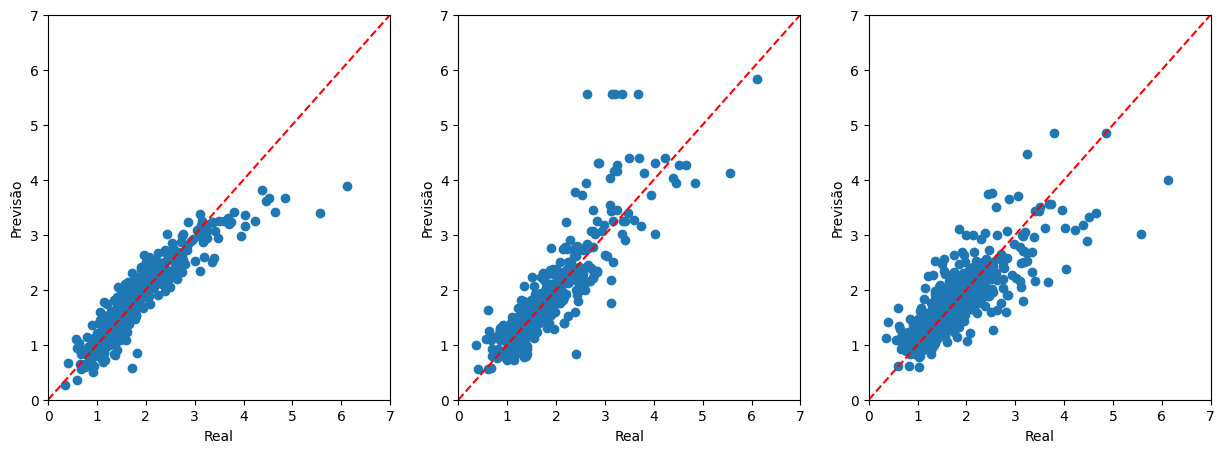

In [64]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [65]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [66]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [68]:
# Eliminando as mesmas colunas da base de treino
eliminar = teste.drop(eliminar, axis = 1)

In [73]:
# Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [75]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:,colunas2]

In [77]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [93]:
# Removendo a coluna LotFrontage, pois nao existia no dataset de treino.

teste = teste.drop('LotFrontage', axis = 1)


In [81]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

- **Vamos precisar retirar os valores vazios pois a regressão linear não vai conseguir trabalhar com valores vazio**
    - Se tentarmos usar essa base, ele vai retornar um **erro** dizendo que o **input possui valores NaN**
- Podemos apenas substituir por -1 como fizemos acima

In [82]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [94]:
# Vamos usar o knn para fazer a previsão
y_pred = reg_rl.predict(teste)

In [95]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [99]:
# E extrair somente o Id e o SalePrice
resultado = teste[['Id','SalePrice']]

In [100]:
# Podemos então exportar essa base
resultado.to_csv("resultado.csv", index=False)

- **Próximos passos**
    - Você pode tentar melhorar a limpeza dos seus dados 
        - [Limpeza de Dados em um Dataset Real - Dados do Titanic](https://www.youtube.com/watch?v=RuDxj894BXQ&t=1218s)
    - Depois é possível fazer a engenharia de recursos
        - [Feature Engineering em Python para Seus Projetos de Ciência de Dados](https://www.youtube.com/watch?v=rigZ7HdfWaM&t=61s)
    - A padronização / normalização dos dados
        - [Padronização e Normalização de Dados para Ciência de Dados](https://www.youtube.com/watch?v=L6rLSYVBfyM&t=12s)
    - E até a seleção de variáveis
        - [Seleção de Recursos (Feature Selection) em Projetos de Ciência de Dados](https://www.youtube.com/watch?v=0yM07AURFRY&t=615s)